# Проект по SQL

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 

* Наша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

***Описание данных***

Таблица **books**
содержит данные о книгах:

    book_id — идентификатор книги;
    author_id — идентификатор автора;
    title — название книги;
    num_pages — количество страниц;
    publication_date — дата публикации книги;
    publisher_id — идентификатор издателя.

Таблица **authors**
содержит данные об авторах:

    author_id — идентификатор автора;
    author — имя автора.

Таблица **publishers**
содержит данные об издательствах:

    publisher_id — идентификатор издательства;
    publisher — название издательства;

Таблица **ratings**
содержит данные о пользовательских оценках книг:

    rating_id — идентификатор оценки;
    book_id — идентификатор книги;
    username — имя пользователя, оставившего оценку;
    rating — оценка книги.

Таблица **reviews**
содержит данные о пользовательских обзорах:

    review_id — идентификатор обзора;
    book_id — идентификатор книги;
    username — имя автора обзора;
    text — текст обзора.

# Задачи

    1. Посчитать, сколько книг вышло после 1 января 2000 года;
    2. Для каждой книги посчитать количество обзоров и среднюю оценку;
    3. Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключаем из анализа брошюры;
    4. Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;
    5. Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

# Схема данных

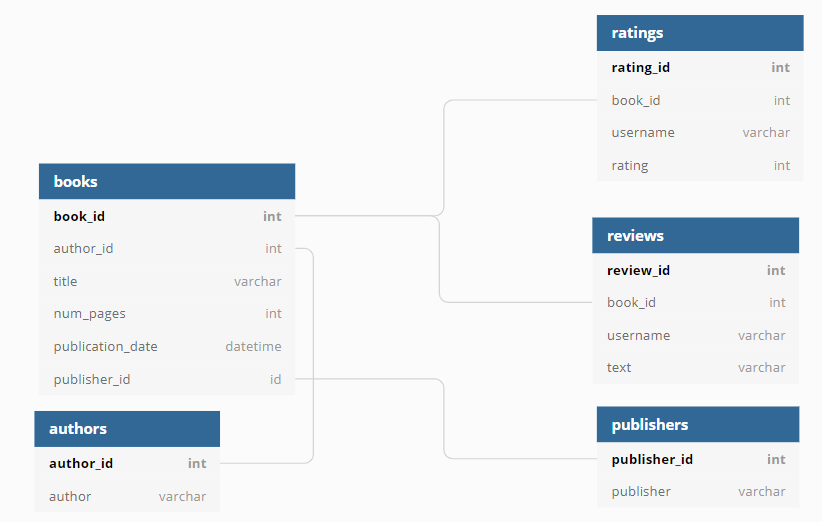

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
            'db': 'data-analyst-final-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

#Чтобы выполнить SQL-запрос, используем Pandas:
def select_sql(sql):
    return pd.io.sql.read_sql(sql, con = engine)

In [2]:
#посмотрим таблицу books, выведим первые строки
sql = '''SELECT *
FROM books 
LIMIT 5; 
'''
select_sql(sql)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [3]:
#посмотрим таблицу authors, выведим первые строки
sql = '''SELECT *
FROM authors 
LIMIT 5; 
'''
select_sql(sql)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [4]:
#посмотрим таблицу publishers, выведим первые строки
sql = '''SELECT *
FROM publishers 
LIMIT 5; 
'''
select_sql(sql)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [5]:
#посмотрим таблицу ratings, выведим первые строки
sql = '''SELECT *
FROM ratings
LIMIT 5; 
'''
select_sql(sql)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [6]:
#посмотрим таблицу reviews, выведим первые строки
sql = '''SELECT *
FROM reviews
LIMIT 5; 
'''
select_sql(sql)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [7]:
#подсчитаем количество строк сразу с использованием небольшой оконной функции:

pd.io.sql.read_sql('''
SELECT *,
       COUNT(*) OVER() AS table_size
FROM reviews 
LIMIT 1        
'''
, con = engine)

,review_id,book_id,username,text,table_size
0,1,1,brandtandrea,Mention society tell send professor analysis. ...,2793


***Задача 1. Посчитаем, сколько книг вышло после 1 января 2000 года***

In [8]:
sql = '''
SELECT COUNT(DISTINCT(book_id)) 
FROM books 
WHERE publication_date > '2000-01-01'
'''
select_sql(sql)

,count
0,819


После 1 января 2020 года было вышло 819 книг.

***Задача 2. Для каждой книги посчитаем количество обзоров и среднюю оценку***

In [9]:
sql =''' 
SELECT books.title,
       books.book_id,
       reviews.number_of_reviews,
       ratings.average_rating
FROM books LEFT JOIN 
                (SELECT book_id,
                        AVG(rating) AS average_rating
                FROM ratings
                GROUP BY book_id) AS ratings ON ratings.book_id = books.book_id
        LEFT JOIN
                (SELECT book_id,
                COUNT(review_id) AS number_of_reviews
                FROM reviews
                GROUP BY book_id) AS reviews ON reviews.book_id = books.book_id              
ORDER BY average_rating DESC 
LIMIT 50; 
''' 
select_sql(sql)

,title,book_id,number_of_reviews,average_rating
0,The Woman in Black,913,2.0,5.000000
1,The Ghost Map: The Story of London's Most Terr...,732,2.0,5.000000
2,Stone of Farewell (Memory Sorrow and Thorn #2),599,1.0,5.000000
3,March,418,2.0,5.000000
4,Marvel 1602,421,2.0,5.000000
5,School's Out—Forever (Maximum Ride #2),553,3.0,5.000000
6,The Walking Dead Book One (The Walking Dead #...,901,2.0,5.000000
7,Plum Island (John Corey #1),516,2.0,5.000000
8,A Dirty Job (Grim Reaper #1),17,4.0,5.000000
9,A Woman of Substance (Emma Harte Saga #1),55,2.0,5.000000


43 книги со средним рейтингом 5 баллов.

In [10]:
sql =''' 
SELECT books.title,
       books.book_id,
       reviews.number_of_reviews,
       ratings.average_rating
FROM books LEFT JOIN 
                (SELECT book_id,
                        AVG(rating) AS average_rating
                FROM ratings
                GROUP BY  book_id) AS ratings ON ratings.book_id = books.book_id             
        LEFT JOIN
                (SELECT book_id,
                        COUNT(review_id) AS number_of_reviews
                FROM reviews  
                GROUP BY book_id) AS reviews ON reviews.book_id = books.book_id
ORDER BY number_of_reviews DESC 
LIMIT 15; 
''' 

select_sql(sql)

,title,book_id,number_of_reviews,average_rating
0,The Natural Way to Draw,808,NaN,3.000000
1,The Cat in the Hat and Other Dr. Seuss Favorites,672,NaN,5.000000
2,Disney's Beauty and the Beast (A Little Golden...,191,NaN,4.000000
3,Essential Tales and Poems,221,NaN,4.000000
4,Leonardo's Notebooks,387,NaN,4.000000
5,Anne Rice's The Vampire Lestat: A Graphic Novel,83,NaN,3.666667
6,Twilight (Twilight #1),948,7.0,3.662500
7,The Giver (The Giver #1),733,6.0,3.750000
8,The Alchemist,627,6.0,3.789474
9,The Lightning Thief (Percy Jackson and the Oly...,779,6.0,4.080645


По количеству отзывов лидирует книга Twilight (Twilight #1) 

 Обратим внимание, что в некоторых случаях не было данных по обзорам - для оптимизации вывода можно заменить пропуски нулями, через `CASE WHEN reviews.number_of_reviews IS NULL THEN 0 ELSE reviews.number_of_reviews END`


***Задача 3. Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры***

In [11]:
sql  = ''' 
SELECT t.publisher_id,
       t.publisher,
       t.book_count
FROM(
    SELECT books.publisher_id,
        COUNT(books.book_id) AS book_count,
        publishers.publisher  
    FROM books LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id
    WHERE num_pages>50
    GROUP BY books.publisher_id, publishers.publisher
    ORDER BY book_count DESC) AS t
LIMIT 1;
''' 
select_sql(sql)

,publisher_id,publisher,book_count
0,212,Penguin Books,42


Penguin Books - издательство, которое выпустило наибольшее число книг толще 50 страниц.

***Задача 4. Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками***

In [12]:
sql = '''
WITH best_rating AS(
         SELECT Count(rating_id),
                Avg(rating) AS average_rating,
                book_id
         FROM ratings
         GROUP BY book_id
         HAVING Count(rating_id) >= 50)
SELECT a.author,
       AVG(r.average_rating) as rating
FROM books t
JOIN best_rating r ON r.book_id = t.book_id
JOIN authors a ON a.author_id = t.author_id
GROUP BY a.author_id, a.author
ORDER BY rating DESC
LIMIT 5;
'''
select_sql(sql)

,author,rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645


У автора J.K. Rowling/Mary GrandPré самая высокая средняя оценка книг (4,28).

В этом запросе в начале были выделены книги с рейтингом через временную таблицу WITH, а затем подсчитан средний рейтинг книг. Можно также было бы подсчитать и количество книг, которые вошли в рейтинг (чтобы понимать объем данных и для контроля результата).  В целом подзапрос из WITH можно было сразу разместить в JOIN.
    
```sql
SELECT a.author,
       AVG(r.average_rating) as rating
FROM books t
JOIN (SELECT COUNT(rating_id),
                Avg(rating) AS average_rating,
                book_id
         FROM ratings
         GROUP BY book_id
         HAVING Count(rating_id) >= 50) r ON r.book_id = t.book_id
JOIN authors a ON a.author_id = t.author_id
GROUP BY a.author_id, a.author
ORDER BY rating DESC
LIMIT 5;
```


***Задача 5.Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.***

In [13]:
sql =''' 
SELECT AVG(reviews.average_review)
FROM (
    SELECT username,
           COUNT(review_id) AS average_review
    FROM reviews
    WHERE username IN (
                SELECT username
                FROM ratings
                GROUP BY username
                HAVING COUNT(rating_id) > 50)
    GROUP BY username) AS reviews; 
''' 
select_sql(sql)

,avg
0,24.333333


В среднем  пользователи,которые поставили больше 50 оценок, делают 24 обзора. 

# Выводы

    1. После 1 января 2020 года было вышло 819 книг.
    2. По количеству отзывов лидирует книга Twilight (Twilight #1).
    3. Penguin Books - издательство, которое выпустило наибольшее число книг толще 50 страниц.
    4. У автора J.K. Rowling/Mary GrandPré самая высокая средняя оценка книг (4,28).
    5. В среднем пользователи,которые поставили больше 50 оценок, делают 24 обзора.